In [4]:
%matplotlib inline
#%matplotlib widget

In [5]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [6]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
29661    0.000000
29662    4.472136
29663    1.414214
29664    4.472136
29665    1.414214
Length: 29666, dtype: float64
3.6102063270058924


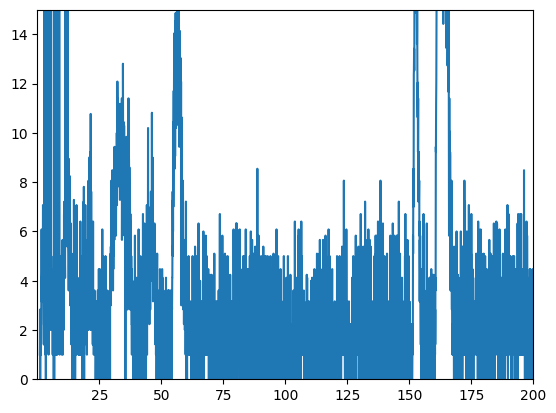

In [7]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack21.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
all_linked_data_filename='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\all_linking_passive_data_21bots.csv'
all_linked_data=pd.read_csv(all_linked_data_filename,index_col=0)
expnum=5
delta_t=1
exp_row=expSumPassive.iloc[expnum]
expnun_Filename=exp_row.linkingFileNamePack
data=all_linked_data[(all_linked_data['Filename']==expnun_Filename)]
data=data.iloc[:,0:4]
raw_diff=data.diff(periods=25*delta_t)
delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
print(delta_r)
time=raw_diff.index/25
fig,ax = plt.subplots()
ax.plot(time,delta_r)
#ax.axis([0.01,200,0,15])
mean_displacment=delta_r.mean(axis=0,numeric_only=True,skipna=True)
mean_V= mean_displacment/delta_t
print(mean_V)

(array([2.182e+03, 0.000e+00, 4.178e+03, 3.937e+03, 5.801e+03, 0.000e+00,
        2.940e+03, 8.450e+02, 2.610e+02, 1.038e+03, 0.000e+00, 7.040e+02,
        1.630e+02, 1.490e+02, 1.150e+02, 8.000e+01, 4.300e+01, 5.400e+01,
        2.000e+01, 1.600e+01, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 6.000e+00, 9.000e+00, 4.000e+00, 1.100e+01,
        5.000e+00, 8.000e+00, 3.000e+00, 8.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

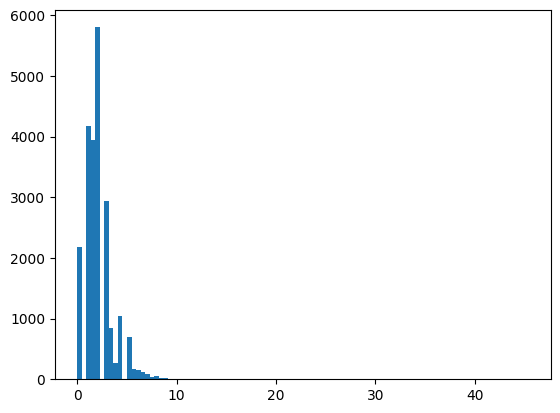

In [41]:
plt.hist(delta_r,bins=100)#,range=(0,10))

In [ ]:
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
delta_t=1 #seconds
velocity_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    FileName=row.linkingFileNamePack
    print(FileName)
    data=all_linked_data[(all_linked_data['Filename']==FileName)]
    data=data.iloc[:,0:4]
    raw_diff=data.diff(periods=25*delta_t)
    delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
    mean_displacment=delta_r.mean(axis=0,numeric_only=True,skipna=True)
    mean_V= mean_displacment/delta_t
    row_data=pd.DataFrame()
    row_data['FileName']=[FileName]
    row_data['Bot_Type']=[row.bottype]
    row_data['diameter']=row['passiveDiameter[cm]']
    row_data['mean_velocity(per_1sec)']=[mean_V]
    velocity_data=pd.concat([velocity_data,row_data],axis=0,ignore_index=True)
print(velocity_data)
velocity_data.to_csv(passive_path+'\\mean_velocity(per_1sec)_21_bots.csv')

aligner_N021_D007_C0548.MP4_link.csv
aligner_N021_D007_C0547.MP4_link.csv
aligner_N021_D007_C0544.MP4_link.csv
aligner_N021_D007_C0542.MP4_link.csv
fronter_N021_D007_C0541.MP4_link.csv
fronter_N021_D007_C0540.MP4_link.csv
fronter_N021_D007_C0539.MP4_link.csv
fronter_N021_D007_C0538.MP4_link.csv
fronter_N021_D012_C0537.MP4_link.csv
fronter_N021_D012_C0536.MP4_link.csv
fronter_N021_D012_C0535.MP4_link.csv
fronter_N021_D012_C0534.MP4_link.csv
fronter_N021_D012_C0533.MP4_link.csv
aligner_N021_D012_C0532.MP4_link.csv
aligner_N021_D012_C0531.MP4_link.csv
aligner_N021_D012_C0530.MP4_link.csv
aligner_N021_D012_C0529.MP4_link.csv
aligner_N021_D018_C0527.MP4_link.csv
aligner_N021_D018_C0526.MP4_link.csv
aligner_N021_D018_C0525.MP4_link.csv
aligner_N021_D018_C0523.MP4_link.csv
fronter_N021_D018_C0521.MP4_link.csv
fronter_N021_D018_C0519.MP4_link.csv
fronter_N021_D018_C0514.MP4_link.csv
fronter_N021_D018_C0516.MP4_link.csv
fronter_N021_D018_C0517.MP4_link.csv
fronter_N021_D028_C0490.MP4_link.csv
f

In [43]:
mean_data=velocity_data.groupby(by=["Bot_Type","diameter"]).mean()
std_data=velocity_data.groupby(by=["Bot_Type","diameter"]).std()

C:\Users\User\AppData\Local\Temp\ipykernel_7404\1949981099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data=velocity_data.groupby(by=["Bot_Type","diameter"]).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7404\1949981099.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_data=velocity_data.groupby(by=["Bot_Type","diameter"]).std()


diameter
7     3.443920
12    5.020262
18    3.026527
28    4.147765
32    2.501352
Name: mean_velocity(per_1sec), dtype: float64
diameter
7     2.838488
12    3.692750
18    2.832687
28    2.104233
32    6.519371
Name: mean_velocity(per_1sec), dtype: float64


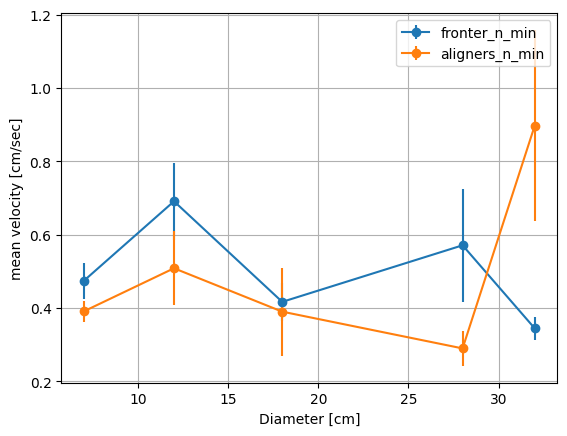

In [53]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels
fronter_data=mean_data.loc[("fronter","mean_velocity(per_1sec)")]
print(fronter_data)
fronter_err=std_data.loc[("fronter","mean_velocity(per_1sec)")]/2
aligner_data=mean_data.loc[("aligner","mean_velocity(per_1sec)")]
print(aligner_data)
aligner_err=std_data.loc[("aligner","mean_velocity(per_1sec)")]/2
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_data*mpp,marker='o',label='fronter_n_min',yerr=fronter_err*mpp)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_data*mpp,marker='o',label='aligners_n_min',yerr=aligner_err*mpp)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('mean velocity [cm/sec]')
ax.grid()
ax.legend()

diameter
7     3.443920
12    5.020262
18    3.026527
28    4.147765
32    2.501352
Name: mean_velocity(per_1sec), dtype: float64
diameter
7     2.838488
12    3.692750
18    2.832687
28    2.104233
32    6.519371
Name: mean_velocity(per_1sec), dtype: float64


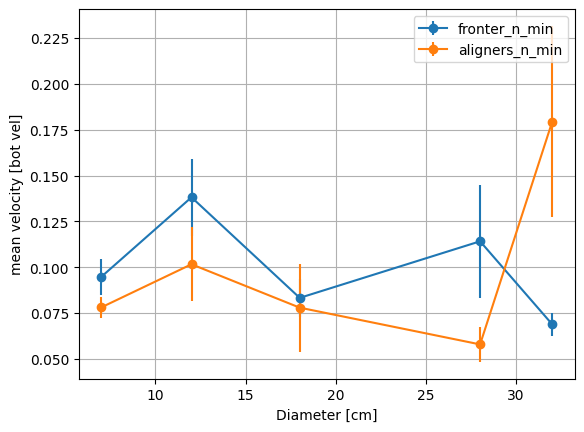

In [55]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels
fronter_data=mean_data.loc[("fronter","mean_velocity(per_1sec)")]
print(fronter_data)
fronter_err=std_data.loc[("fronter","mean_velocity(per_1sec)")]/2
aligner_data=mean_data.loc[("aligner","mean_velocity(per_1sec)")]
print(aligner_data)
aligner_err=std_data.loc[("aligner","mean_velocity(per_1sec)")]/2
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_data*mpp/5,marker='o',label='fronter_n_min',yerr=fronter_err*mpp/5)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_data*mpp/5,marker='o',label='aligners_n_min',yerr=aligner_err*mpp/5)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('mean velocity [bot vel]')
ax.grid()
ax.legend()